# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [84]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [85]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [86]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [87]:
df_train.shape

(15223, 52)

In [88]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [89]:
df_test.shape

(14910, 52)

In [90]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [91]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [92]:
df = df_test.append(df_train).reset_index(drop=True)

In [93]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [95]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Высшее', 'Среднее специальное', 'Два и более высших образования', 'Среднее', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Управляющая компания', 'Сельское хозяйство', 'Развлечения/Искусство', 'Наука', 'Туризм', 'Банк/Финансы', 'Строительство', 'Другие сферы', 'Государственная служба', 'Салоны красоты и здоровья', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Сборочные производства', 'Подбор персонала', 'Здравоохранение', 'Страхование', 'Образование', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Логистика', 'Торговля', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Маркетинг', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [96]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [97]:
df_train.shape

(15223, 53)

In [98]:
df_train=df_train[~df_train['GEN_INDUSTRY'].isnull()]
df_train=df_train[~df_train['WORK_TIME'].isnull()]
df_train=df_train[~df_train['TP_PROVINCE'].isnull()]
df_train=df_train[~df_train['REGION_NM'].isnull()]
df_train['PREVIOUS_CARD_NUM_UTILIZED']=df_train['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
df_train.shape
df_train

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,0.0,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,0.0,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,0.0,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,0.0,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,0.0,train
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,1,2,1,11,0,0,0,0,0.0,train
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,1,2,2,14,0,0,0,0,0.0,train
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,2,1,11,0,0,0,0,0.0,train
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,1,1,1,3,0,0,0,0,0.0,train
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,1,1,1,6,0,0,0,0,0.0,train


При исключении пустых данных в столбцах GEN_INDUSTRY,WORK_TIME,TP_PROVINCE,REGION_NM  мы потеряли ~ 2000 записей из 15000. 
Потери не очень большие относительно общего размера выборки

В столбце PREVIOUS_CARD_NUM_UTILIZED пустые значения можно заменить на 0(исходя из description)


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [99]:
df_train=pd.get_dummies(df_train, columns=['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','PERSONAL_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])

In [100]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,59910150,0,49,1,0,1,2,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,59910230,0,32,1,0,1,3,3,1,1,...,0,0,0,0,0,0,0,0,0,1
2,59910525,0,52,1,0,1,4,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,59910803,0,39,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,59911781,0,30,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


Категориальные признаки есть, кодируем их

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

    

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [101]:
dots_troube_columns=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
missed_trouble_columns=['GEN_INDUSTRY','WORK_TIME','TP_PROVINCE','REGION_NM']
classified_trouble_columns=['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','PERSONAL_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM']

def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    for i in dots_troube_columns:
        df_output[i]=df_output[i].map(lambda x:x.replace(',','.')).astype('float')
    for j in missed_trouble_columns:
        df_output=df_output[~df_output[j].isnull()]
    df_output['PREVIOUS_CARD_NUM_UTILIZED']=df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    df_output=pd.get_dummies(df_output,columns=classified_trouble_columns)
    return df_output

In [102]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [103]:
df_train_preproc.columns

Index(['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
       'CHILD_TOTAL', 'DEPENDANTS', 'REG_FACT_FL', 'FACT_POST_FL',
       'REG_POST_FL',
       ...
       'REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ', 'REGION_NM_ЗАПАДНО-СИБИРСКИЙ',
       'REGION_NM_ПОВОЛЖСКИЙ', 'REGION_NM_ПРИВОЛЖСКИЙ',
       'REGION_NM_СЕВЕРО-ЗАПАДНЫЙ', 'REGION_NM_УРАЛЬСКИЙ',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ 1', 'REGION_NM_ЦЕНТРАЛЬНЫЙ 2',
       'REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС', 'REGION_NM_ЮЖНЫЙ'],
      dtype='object', length=742)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [104]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [105]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y, test_size=0.3, random_state=42)
y_train_2.shape

(9498,)

In [106]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
## DecisionTreeClassifier
modelDTC=DecisionTreeClassifier()
modelDTC.fit(X_train_2,y_train_2)
predictDTC=modelDTC.predict(X_test_2)
predictDTC_proba=modelDTC.predict_proba(X_test_2)

##RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train_2,y_train_2)
predictRFC=modelRFC.predict(X_test_2)
predictRFC_proba=modelRFC.predict_proba(X_test_2)


##LogisticRegression
modelLR=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=1)
modelLR.fit(X_train_2,y_train_2)
predictLR=modelLR.predict(X_test_2)
predictLR_proba=modelLR.predict_proba(X_test_2)


/home/rromanov/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [160]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

print('=============={}=============='.format('DecisionTreeClassifier'))
print('precision', precision_score(y_test_2, predictDTC))
print('recall', recall_score(y_test_2, predictDTC))
print('accuracy', accuracy_score(y_test_2, predictDTC))


print('=============={}=============='.format('RandomForestClassifier'))
print('precision', precision_score(y_test_2, predictRFC))
print('recall', recall_score(y_test_2, predictRFC))
print('accuracy', accuracy_score(y_test_2, predictRFC))

print('=============={}=============='.format('LogisticRegression'))
print('precision', precision_score(y_test_2, predictLR))
print('recall', recall_score(y_test_2, predictLR))
print('accuracy', accuracy_score(y_test_2, predictLR))


==============DecisionTreeClassifier==============
precision 0.162839248434238
recall 0.16049382716049382
accuracy 0.801277327437976
==============RandomForestClassifier==============
precision 0.18181818181818182
recall 0.00411522633744856
accuracy 0.8788995332842053
==============LogisticRegression==============
precision 0.0
recall 0.0
accuracy 0.8801277327437976


Огромная просьба к преподавателю ответить на 2 вопроса ниже:
1) Я правильно понимаю что текст ниже про удивление качеством касается именно того факта что для LogisticRegression precision и recall == 0, а accuracy самая высокая среди моделей?
2) Если первое утвержене верно, то какие характеристики данных влияют на такое поведение? или такая ситуация может возникнуть рандомно?

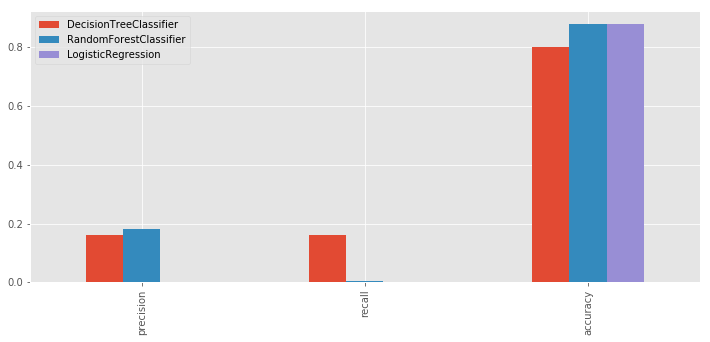

In [122]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
precisions = (precision_score(y_test_2, predictDTC),precision_score(y_test_2, predictRFC),precision_score(y_test_2, predictLR))
recalls = (recall_score(y_test_2, predictDTC), recall_score(y_test_2, predictRFC), recall_score(y_test_2, predictLR))
accuracy = (accuracy_score(y_test_2, predictDTC), accuracy_score(y_test_2, predictRFC), accuracy_score(y_test_2, predictLR))
data = {'DecisionTreeClassifier':[precision_score(y_test_2, predictDTC),recall_score(y_test_2, predictDTC),accuracy_score(y_test_2, predictDTC)],
       'RandomForestClassifier':[precision_score(y_test_2, predictRFC),recall_score(y_test_2, predictRFC),accuracy_score(y_test_2, predictRFC)],
       'LogisticRegression':[precision_score(y_test_2, predictLR),recall_score(y_test_2, predictLR),accuracy_score(y_test_2, predictLR)]}
pddata = pd.DataFrame(data=data, index=['precision','recall','accuracy'])
pddata.plot.bar()





(-0.01, 1.01)

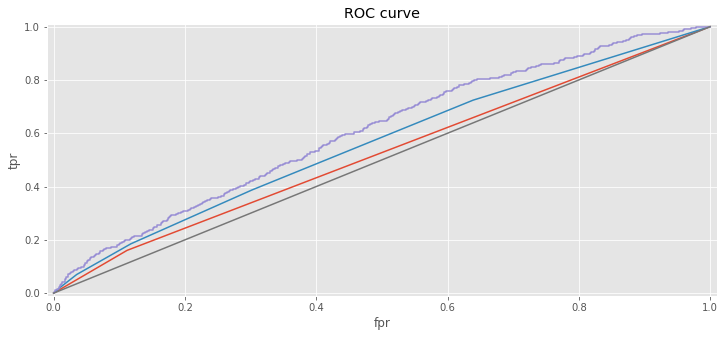

In [144]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии


## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
fprDTC, tprDTC, thresholdsDTC = roc_curve(y_test_2, predictDTC_proba[:,1])
fprRFC, tprRFC, thresholdsRFC = roc_curve(y_test_2, predictRFC_proba[:,1])
fprLR, tprLR, thresholdsLR = roc_curve(y_test_2, predictLR_proba[:,1])

plt.plot(fprDTC, tprDTC)
plt.plot(fprRFC, tprRFC)
plt.plot(fprLR, tprLR)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [156]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
cvDTC= cross_val_score(modelDTC, X_test_2, y_test_2, scoring='roc_auc',cv=10)
cvRFC= cross_val_score(modelRFC, X_test_2, y_test_2, scoring='roc_auc',cv=10)
cvLR= cross_val_score(modelLR, X_test_2, y_test_2, scoring='roc_auc',cv=10)

print('DTC cv mean:',cvDTC.mean())
print('RFC cv mean:',cvRFC.mean())
print('LR cv mean:',cvLR.mean())

/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

DTC cv mean: 0.5347523924409247
RFC cv mean: 0.5675736023039334
LR cv mean: 0.6009906725252152


/home/rromanov/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [158]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = modelLR.predict_proba(X_test)
## Your Code Here

array([[0.82579647, 0.17420353],
       [0.86166537, 0.13833463],
       [0.76981624, 0.23018376],
       ...,
       [0.8863648 , 0.1136352 ],
       [0.80640605, 0.19359395],
       [0.78726672, 0.21273328]])

(-0.01, 1.01)

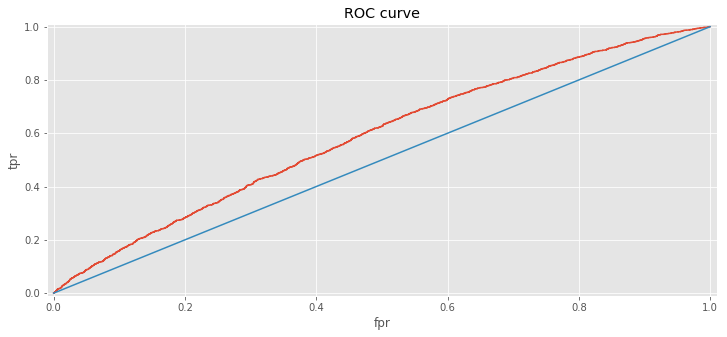

In [159]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
fprLR_final, tprLR_final, thresholdsLR_final = roc_curve(y_test, predict[:,1])

plt.plot(fprLR_final, tprLR_final)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)